# Table of contents 

### 1. Import Libraries 
### 2. Scrape data and create dataframe
### 3. Preprocess/clean text 
### 4. Data Analysis 

    i. Statistical Analysis
    
    ii. Sentiment Analysis 
    
    iii. Word Analysis
    
    iv. Emotional Analysis 

### 1. Import libraries 

In [1]:
from bs4 import BeautifulSoup
import requests 
import pandas as pd 
import numpy as np 
import json 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#preprocessing tools 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
nltk.download('omw-1.4')

import spacy
nlp = spacy.load("en_core_web_sm")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/wenboyang/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/Users/wenboyang/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pip install app_store_scraper

Note: you may need to restart the kernel to use updated packages.


In [3]:
from app_store_scraper import AppStore

In [4]:
#define path 
path = '/Users/wenboyang/Desktop/Data Analytics/Mental Health Apps/'

### 2. Scrape data 

In [5]:
betterhelp = AppStore(country='us', app_name='betterhelp', app_id='995252384')

betterhelp.review(how_many=200)

2023-10-22 20:35:29,090 [INFO] Base - Initialised: AppStore('us', 'betterhelp', 995252384)
2023-10-22 20:35:29,092 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/betterhelp/id995252384
2023-10-22 20:35:31,431 [INFO] Base - [id:995252384] Fetched 200 reviews (200 fetched in total)


In [6]:
#convert data to dataframe structure 
bhelpdf = pd.DataFrame(np.array(betterhelp.reviews),columns=['review'])
bhelpdf2 = bhelpdf.join(pd.DataFrame(bhelpdf.pop('review').tolist()))

#add app name column 
bhelpdf2.insert(0, 'app', 'Betterhelp')

bhelpdf2.head()

,app,date,review,rating,isEdited,userName,title,developerResponse
0,Betterhelp,2022-07-07 02:07:58,This is the perfect therapy for me. I am a bus...,5,False,baileysmith7,Love,NaN
1,Betterhelp,2023-09-14 22:16:29,This has been a huge help with not only connec...,5,False,CNGJCG,Great option for someone with a busy work sche...,NaN
2,Betterhelp,2021-05-12 23:57:19,I’d been putting off finding a therapist becau...,5,False,essdogg,Only wish I’d joined sooner,"{'id': 35897874, 'body': 'Hey essdogg, My name..."
3,Betterhelp,2021-11-09 15:52:39,I appreciate this company and their support ha...,5,False,Tiffany J. Kim,You Need to Keep Searching To Find Your Clinician,NaN
4,Betterhelp,2023-05-22 14:44:35,I have been using better help for over a year ...,5,False,Melanie 👑,Simply amazing,NaN


In [7]:
headspace = AppStore(country='us', app_name='headspace', app_id='493145008')
headspace.review(how_many=200)

2023-10-22 20:35:32,581 [INFO] Base - Initialised: AppStore('us', 'headspace', 493145008)
2023-10-22 20:35:32,582 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/headspace/id493145008
2023-10-22 20:35:35,288 [INFO] Base - [id:493145008] Fetched 200 reviews (200 fetched in total)


In [8]:
headspace.reviews

[{'date': datetime.datetime(2023, 4, 11, 16, 57, 43),
  'review': 'The app that I chose to review is called Headspace, and it is a meditation app that helps manage stress by showing mindfulness excercises, and offers information on how to manage other things such as anxiety or worry. This app did an amazing job at helping me be more mindful throughout the day. In the "Headspace library", there were tabs for certain scenarios like "navigating injustice, reframe stress and relax, mindful money, anger/sadness/growth, mindful eating, and guide to sleep,". Each tab had different podcasts and meditation methods that corresponded to that subject. I enjoyed using this app because as a person who worries often, this tool allowed me to take time out of my day to clear my head and do something that betters my mental health. This app is relevant to abnormal psychology because it includes ways to manage anxiety and worry. Although it is not an app that diagnoses or properly treats symptoms of anxie

In [9]:
#convert data to dataframe 
headspacedf = pd.DataFrame(np.array(headspace.reviews),columns=['review'])
headspacedf2 = headspacedf.join(pd.DataFrame(headspacedf.pop('review').tolist()))

#add app name column 
headspacedf2.insert(0, 'app', 'Headspace')

headspacedf2.head()

,app,date,review,rating,isEdited,userName,title,developerResponse
0,Headspace,2023-04-11 16:57:43,The app that I chose to review is called Heads...,5,False,Kaysoph,This is a very useful app!,NaN
1,Headspace,2022-10-24 16:00:47,"The best mindfulness app. User friendly, the m...",5,False,Debbieamy112495,An Absolute Life Changer,NaN
2,Headspace,2021-08-08 13:26:01,I began using this application a few years bac...,5,False,Piclover56531,"Head Space, The Final Frontier",NaN
3,Headspace,2022-10-16 23:56:57,I have use this app for several days I have ta...,4,False,asndnsjsjfjansndbajxjsn,Compared to what I have learned in my PSY classes,NaN
4,Headspace,2021-08-03 16:26:06,I was introduced to meditation more than 25 ye...,5,False,Zorayda M,Support for seasoned meditators,NaN


In [10]:
#define column order 
order = ['app','date', 'review', 'rating','isEdited','userName','title','developerResponse']

headspacedf2 = headspacedf2[order]

#print
headspacedf2.head()

,app,date,review,rating,isEdited,userName,title,developerResponse
0,Headspace,2023-04-11 16:57:43,The app that I chose to review is called Heads...,5,False,Kaysoph,This is a very useful app!,NaN
1,Headspace,2022-10-24 16:00:47,"The best mindfulness app. User friendly, the m...",5,False,Debbieamy112495,An Absolute Life Changer,NaN
2,Headspace,2021-08-08 13:26:01,I began using this application a few years bac...,5,False,Piclover56531,"Head Space, The Final Frontier",NaN
3,Headspace,2022-10-16 23:56:57,I have use this app for several days I have ta...,4,False,asndnsjsjfjansndbajxjsn,Compared to what I have learned in my PSY classes,NaN
4,Headspace,2021-08-03 16:26:06,I was introduced to meditation more than 25 ye...,5,False,Zorayda M,Support for seasoned meditators,NaN


In [11]:
talkspace = AppStore(country='us', app_name='talkspace', app_id='661829386')
talkspace.review(how_many=100)

2023-10-22 20:35:36,630 [INFO] Base - Initialised: AppStore('us', 'talkspace', 661829386)
2023-10-22 20:35:36,632 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/talkspace/id661829386
2023-10-22 20:35:37,657 [INFO] Base - [id:661829386] Fetched 100 reviews (100 fetched in total)


In [12]:
#convert data to dataframe structure 
talkspacedf = pd.DataFrame(np.array(talkspace.reviews),columns=['review'])
talkspacedf2 = talkspacedf.join(pd.DataFrame(talkspacedf.pop('review').tolist()))

#add app name column 
talkspacedf2.insert(0, 'app', 'Talkspace')

talkspacedf2.head()

,app,date,developerResponse,review,rating,isEdited,userName,title
0,Talkspace,2023-03-24 13:57:21,"{'id': 35679151, 'body': 'Hi there, I am happy...",I will start by saying that I have been with m...,4,False,Paris51690,A few critical issues
1,Talkspace,2023-07-30 00:11:47,"{'id': 37956149, 'body': 'Hi there, I'm sorry ...","I wasn’t very impressed, both with the therapi...",4,True,Bouch620,Not impressed
2,Talkspace,2021-10-29 13:00:33,"{'id': 26038969, 'body': 'Hi there, thank you ...",Give me all of my money back. I don’t write ap...,1,False,texasbaby27,Refund. Me. Now.
3,Talkspace,2022-09-04 04:21:35,NaN,What an absolute nightmare. I can’t recommend ...,1,False,MeanderingTwist,Nightmare and Robbery. AVOID.
4,Talkspace,2022-07-16 21:55:23,"{'id': 31245773, 'body': 'Hi there, thank you ...",I was initially matched with a therapist that ...,2,False,gradele,Extremely disappointed


In [13]:
# Reorder the columns
talkspacedf2 = talkspacedf2[order]

#print df
talkspacedf2.head()

,app,date,review,rating,isEdited,userName,title,developerResponse
0,Talkspace,2023-03-24 13:57:21,I will start by saying that I have been with m...,4,False,Paris51690,A few critical issues,"{'id': 35679151, 'body': 'Hi there, I am happy..."
1,Talkspace,2023-07-30 00:11:47,"I wasn’t very impressed, both with the therapi...",4,True,Bouch620,Not impressed,"{'id': 37956149, 'body': 'Hi there, I'm sorry ..."
2,Talkspace,2021-10-29 13:00:33,Give me all of my money back. I don’t write ap...,1,False,texasbaby27,Refund. Me. Now.,"{'id': 26038969, 'body': 'Hi there, thank you ..."
3,Talkspace,2022-09-04 04:21:35,What an absolute nightmare. I can’t recommend ...,1,False,MeanderingTwist,Nightmare and Robbery. AVOID.,NaN
4,Talkspace,2022-07-16 21:55:23,I was initially matched with a therapist that ...,2,False,gradele,Extremely disappointed,"{'id': 31245773, 'body': 'Hi there, thank you ..."


In [14]:
sanvello = AppStore(country='us', app_name='sanvello', app_id='922968861')
sanvello.review(how_many=100)

2023-10-22 20:35:38,854 [INFO] Base - Initialised: AppStore('us', 'sanvello', 922968861)
2023-10-22 20:35:38,855 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/sanvello/id922968861
2023-10-22 20:35:39,915 [INFO] Base - [id:922968861] Fetched 100 reviews (100 fetched in total)


In [15]:
#convert data to dataframe structure
sanvdf = pd.DataFrame(np.array(sanvello.reviews),columns=['review'])
sanvdf2 = sanvdf.join(pd.DataFrame(sanvdf.pop('review').tolist()))

#add app name column 
sanvdf2.insert(0, 'app', 'Sanvello')

sanvdf2.head()

,app,date,review,rating,isEdited,userName,title,developerResponse
0,Sanvello,2019-03-22 18:26:44,"Pacifica, especially the premium version, has ...",5,False,Reisa S,"Invaluable Tool, Constantly Evolving",NaN
1,Sanvello,2020-07-02 04:31:57,This app is nice to have to keep track of your...,4,False,MoMo220011,overall a good app,"{'id': 16835143, 'body': 'Thank you so much fo..."
2,Sanvello,2017-10-22 16:11:59,This app is amazing if you want to be able to ...,5,False,Makeup b,I feel like I can actually get better,"{'id': 1564547, 'body': 'Thank you for the kin..."
3,Sanvello,2018-03-15 04:12:07,I Came Across This App While Reading a Magazin...,5,False,HEISMYREASON3012,CHANGE & HEALING BEGINS HERE...,NaN
4,Sanvello,2021-10-23 00:22:16,I like the concept of this app and it helps in...,3,False,ms veganista,Hard for me to understand this,"{'id': 25886140, 'body': 'Thanks for your revi..."


In [16]:
#combine dataframes 
combined_df = bhelpdf2.append([headspacedf2, talkspacedf2, sanvdf2], ignore_index=True)
combined_df.head()

/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_24166/1648693255.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = bhelpdf2.append([headspacedf2, talkspacedf2, sanvdf2], ignore_index=True)


,app,date,review,rating,isEdited,userName,title,developerResponse
0,Betterhelp,2022-07-07 02:07:58,This is the perfect therapy for me. I am a bus...,5,False,baileysmith7,Love,NaN
1,Betterhelp,2023-09-14 22:16:29,This has been a huge help with not only connec...,5,False,CNGJCG,Great option for someone with a busy work sche...,NaN
2,Betterhelp,2021-05-12 23:57:19,I’d been putting off finding a therapist becau...,5,False,essdogg,Only wish I’d joined sooner,"{'id': 35897874, 'body': 'Hey essdogg, My name..."
3,Betterhelp,2021-11-09 15:52:39,I appreciate this company and their support ha...,5,False,Tiffany J. Kim,You Need to Keep Searching To Find Your Clinician,NaN
4,Betterhelp,2023-05-22 14:44:35,I have been using better help for over a year ...,5,False,Melanie 👑,Simply amazing,NaN


### 3. Perform Text Preprocessing

In [17]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/wenboyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wenboyang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wenboyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Remove punctuation, numbers, and convert to lowercase
combined_df['cleaned_text'] = combined_df['review'].str.replace('[^a-zA-Z\s]', '').str.lower()

# Tokenize text
combined_df['tokenized_text'] = combined_df['cleaned_text'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
combined_df['filtered_text'] = combined_df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
combined_df['lemmatized_text'] = combined_df['filtered_text'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_24166/168689488.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_df['cleaned_text'] = combined_df['review'].str.replace('[^a-zA-Z\s]', '').str.lower()


In [19]:
combined_df.head()

,app,date,review,rating,isEdited,userName,title,developerResponse,cleaned_text,tokenized_text,filtered_text,lemmatized_text
0,Betterhelp,2022-07-07 02:07:58,This is the perfect therapy for me. I am a bus...,5,False,baileysmith7,Love,NaN,this is the perfect therapy for me i am a busy...,"[this, is, the, perfect, therapy, for, me, i, ...","[perfect, therapy, busy, person, balance, work...","[perfect, therapy, busy, person, balance, work..."
1,Betterhelp,2023-09-14 22:16:29,This has been a huge help with not only connec...,5,False,CNGJCG,Great option for someone with a busy work sche...,NaN,this has been a huge help with not only connec...,"[this, has, been, a, huge, help, with, not, on...","[huge, help, connecting, high, trained, therap...","[huge, help, connecting, high, trained, therap..."
2,Betterhelp,2021-05-12 23:57:19,I’d been putting off finding a therapist becau...,5,False,essdogg,Only wish I’d joined sooner,"{'id': 35897874, 'body': 'Hey essdogg, My name...",id been putting off finding a therapist becaus...,"[id, been, putting, off, finding, a, therapist...","[id, putting, finding, therapist, sifting, loc...","[id, putting, finding, therapist, sifting, loc..."
3,Betterhelp,2021-11-09 15:52:39,I appreciate this company and their support ha...,5,False,Tiffany J. Kim,You Need to Keep Searching To Find Your Clinician,NaN,i appreciate this company and their support ha...,"[i, appreciate, this, company, and, their, sup...","[appreciate, company, support, great, trying, ...","[appreciate, company, support, great, trying, ..."
4,Betterhelp,2023-05-22 14:44:35,I have been using better help for over a year ...,5,False,Melanie 👑,Simply amazing,NaN,i have been using better help for over a year ...,"[i, have, been, using, better, help, for, over...","[using, better, help, year, first, let, say, t...","[using, better, help, year, first, let, say, t..."


In [20]:
# Drop rows with missing 'lemmatized_text'
combined_df = combined_df.dropna(subset=['lemmatized_text'])

### 4. Data Analysis 

### i. Get Summary Statistics

In [21]:
# Group by 'app_name' and calculate summary statistics
summary_stats = combined_df.groupby('app').agg({
    'rating': ['mean', 'std', 'min', 'max']
})

In [22]:
summary_stats

rating                  
             mean       std min max
app                                
Betterhelp   4.33  1.315199   1   5
Headspace    4.49  1.017387   1   5
Sanvello     4.27  1.221483   1   5
Talkspace    1.39  0.863339   1   5

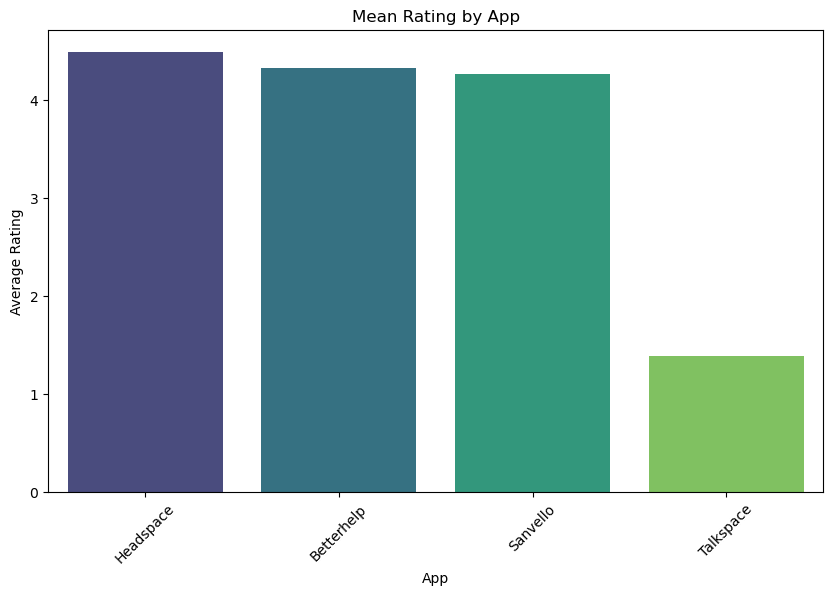

In [23]:
# Group the data by 'app_name' and calculate the mean of 'compound_sentiment'
grouped_data = combined_df.groupby('app')['rating'].mean().reset_index()

# Sort the data by 'rating' in descending order
grouped_data = grouped_data.sort_values(by='rating', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(y='rating', x='app', data=grouped_data, palette='viridis')
plt.ylabel('Average Rating')
plt.xlabel('App')
plt.title('Mean Rating by App')
plt.xticks(rotation=45)
plt.show()

### ii. Conduct sentiment analysis 

In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

# Download the VADER lexicon if you haven't already
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/wenboyang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
print(combined_df['lemmatized_text'])

0      [perfect, therapy, busy, person, balance, work...
1      [huge, help, connecting, high, trained, therap...
2      [id, putting, finding, therapist, sifting, loc...
3      [appreciate, company, support, great, trying, ...
4      [using, better, help, year, first, let, say, t...
                             ...                        
595    [confusing, hard, navigate, first, screen, lik...
596    [great, see, mood, line, graph, day, using, ap...
597    [sanvello, awesome, people, need, help, emotio...
598    [link, got, provider, tried, sign, app, purcha...
599    [app, really, great, even, week, starting, fee...
Name: lemmatized_text, Length: 600, dtype: object


In [26]:
# Convert the 'lemmatized_text' column to strings
combined_df['lemmatized_text'] = combined_df['lemmatized_text'].apply(lambda x: ' '.join(x))

# Replace commas with spaces
combined_df['lemmatized_text'] = combined_df['lemmatized_text'].str.replace(',', ' ')

In [27]:
# Create a new column for sentiment scores
combined_df['sentiment_scores'] = combined_df['lemmatized_text'].apply(lambda x: sid.polarity_scores(x))

# Extract the sentiment polarity score
combined_df['sentiment_polarity'] = combined_df['sentiment_scores'].apply(lambda x: x['compound'])  # Use 'compound' for polarity

# Now, 'sentiment_polarity' column contains the sentiment polarity score for each review

# Display the DataFrame with sentiment scores
print(combined_df[['lemmatized_text', 'sentiment_polarity']])

                                       lemmatized_text  sentiment_polarity
0    perfect therapy busy person balance work full ...              0.9912
1    huge help connecting high trained therapist pe...              0.9799
2    id putting finding therapist sifting local rec...              0.9895
3    appreciate company support great trying talksp...              0.9901
4    using better help year first let say therapist...              0.9826
..                                                 ...                 ...
595  confusing hard navigate first screen like kitc...             -0.9182
596  great see mood line graph day using app realiz...              0.9860
597  sanvello awesome people need help emotion medi...              0.9846
598  link got provider tried sign app purchase comp...              0.2263
599  app really great even week starting feel bette...              0.9255

[600 rows x 2 columns]


Create sentiment graph 

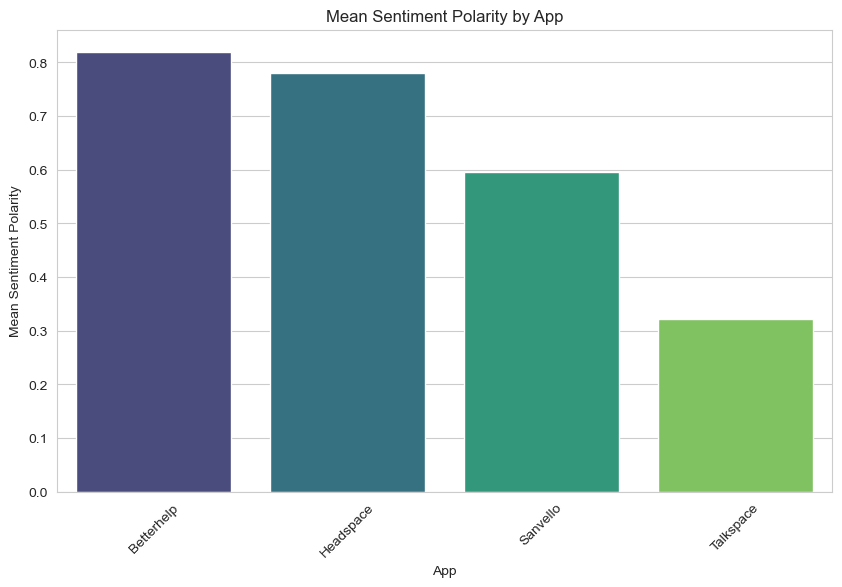

In [41]:
# Calculate mean sentiment polarity for each app
mean_sentiment = combined_df.groupby('app')['sentiment_polarity'].mean().sort_values(ascending=False)

# Create a barplot with ordered apps
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_sentiment.index, y=mean_sentiment.values, palette='viridis', order=mean_sentiment.index)
plt.xlabel('App')
plt.ylabel('Mean Sentiment Polarity')
plt.title('Mean Sentiment Polarity by App')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

### iii. Common Words 

In [42]:
# Combine all titles into one string per app
combined_df['title'] = combined_df['title'].str.lower()  # Convert to lowercase
grouped_titles = combined_df.groupby('app')['title'].apply(' '.join)

# Tokenize the titles using regular expressions to remove punctuation
common_words_by_app = {}

for app, titles in grouped_titles.items():
    words = re.findall(r'\b\w+\b', titles)  # Use regex to find words

    # Remove stopwords (optional)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Get the frequency distribution of words
    freq_dist = FreqDist(words)

    # Get the N most common words
    N = 10  # Change N to get the desired number of common words
    common_words = freq_dist.most_common(N)

    common_words_by_app[app] = common_words

# Print the common words for each app
for app, words in common_words_by_app.items():
    print(f"Most common words for {app}: {words}")

Most common words for Betterhelp: [('great', 28), ('therapy', 18), ('better', 17), ('betterhelp', 17), ('app', 14), ('help', 13), ('helpful', 12), ('amazing', 11), ('therapist', 10), ('service', 9)]
Most common words for Headspace: [('app', 43), ('life', 24), ('great', 17), ('headspace', 13), ('changing', 12), ('meditation', 12), ('love', 10), ('amazing', 9), ('best', 9), ('good', 8)]
Most common words for Sanvello: [('app', 22), ('great', 14), ('amazing', 6), ('best', 6), ('love', 6), ('life', 6), ('mental', 5), ('helpful', 5), ('health', 4), ('changing', 4)]
Most common words for Talkspace: [('service', 10), ('disappointed', 6), ('terrible', 6), ('support', 6), ('money', 6), ('waste', 5), ('time', 5), ('scam', 5), ('app', 5), ('therapy', 5)]


In [43]:
# Convert the common_words_by_app dictionary to a DataFrame
data = []

for app, words in common_words_by_app.items():
    for word, count in words:
        data.append([app, word, count])

df = pd.DataFrame(data, columns=['App', 'Word', 'Count'])

# Display the DataFrame
print(df)

           App          Word  Count
0   Betterhelp         great     28
1   Betterhelp       therapy     18
2   Betterhelp        better     17
3   Betterhelp    betterhelp     17
4   Betterhelp           app     14
5   Betterhelp          help     13
6   Betterhelp       helpful     12
7   Betterhelp       amazing     11
8   Betterhelp     therapist     10
9   Betterhelp       service      9
10   Headspace           app     43
11   Headspace          life     24
12   Headspace         great     17
13   Headspace     headspace     13
14   Headspace      changing     12
15   Headspace    meditation     12
16   Headspace          love     10
17   Headspace       amazing      9
18   Headspace          best      9
19   Headspace          good      8
20    Sanvello           app     22
21    Sanvello         great     14
22    Sanvello       amazing      6
23    Sanvello          best      6
24    Sanvello          love      6
25    Sanvello          life      6
26    Sanvello        mental

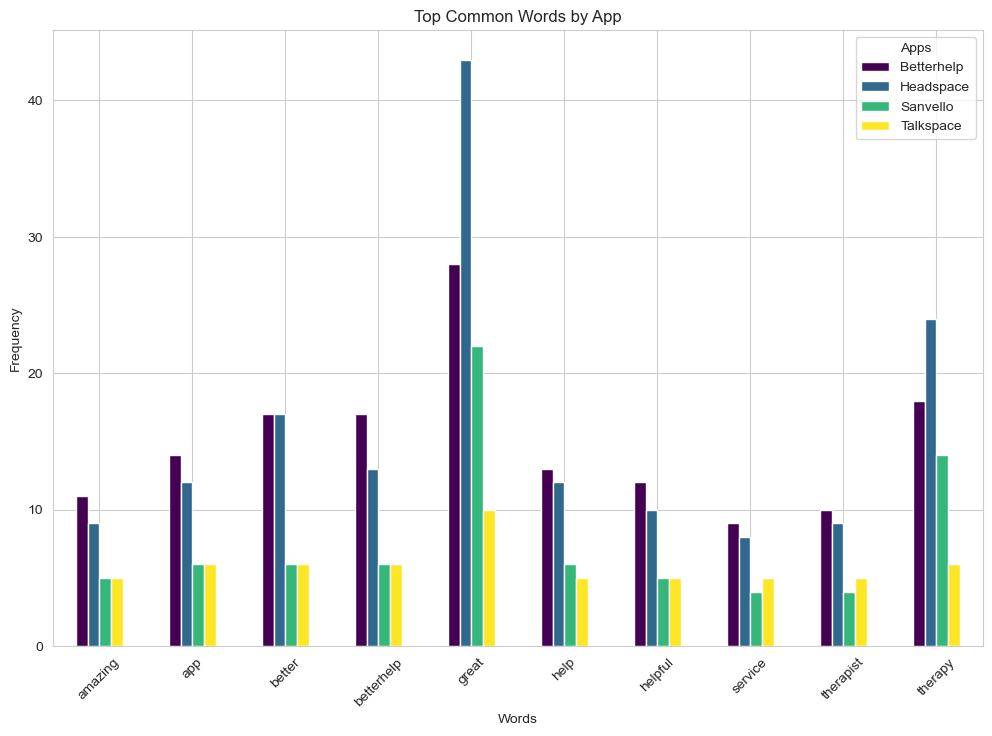

In [44]:
# Create a DataFrame from the provided data
data = {
    'App': ['Betterhelp']*10 + ['Headspace']*10 + ['Sanvello']*10 + ['Talkspace']*10,
    'Word': ['great', 'therapy', 'better', 'betterhelp', 'app', 'help', 'helpful', 'amazing', 'therapist', 'service']*4,
    'Count': [28, 18, 17, 17, 14, 13, 12, 11, 10, 9, 43, 24, 17, 13, 12, 12, 10, 9, 9, 8, 22, 14, 6, 6, 6, 6, 5, 5, 4, 4, 10, 6, 6, 6, 6, 5, 5, 5, 5, 5]
}

df = pd.DataFrame(data)

# Pivot the DataFrame for easy plotting
pivot_df = df.pivot(index='Word', columns='App', values='Count').fillna(0)

# Plot grouped bar chart
ax = pivot_df.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Common Words by App')
plt.xticks(rotation=45)
plt.legend(title='Apps')
plt.show()

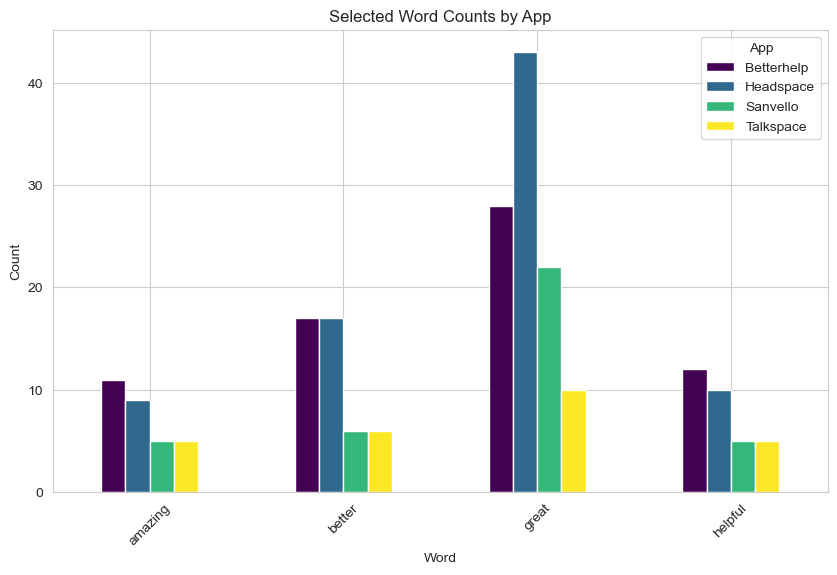

In [45]:
# Create a DataFrame with the provided data
data = {
    'App': ['Betterhelp', 'Betterhelp', 'Betterhelp', 'Betterhelp', 'Betterhelp', 'Betterhelp', 'Betterhelp', 'Betterhelp', 'Betterhelp', 'Betterhelp',
            'Headspace', 'Headspace', 'Headspace', 'Headspace', 'Headspace', 'Headspace', 'Headspace', 'Headspace', 'Headspace', 'Headspace',
            'Sanvello', 'Sanvello', 'Sanvello', 'Sanvello', 'Sanvello', 'Sanvello', 'Sanvello', 'Sanvello', 'Sanvello', 'Sanvello',
            'Talkspace', 'Talkspace', 'Talkspace', 'Talkspace', 'Talkspace', 'Talkspace', 'Talkspace', 'Talkspace', 'Talkspace', 'Talkspace'],
    'Word': ['great', 'therapy', 'better', 'betterhelp', 'app', 'help', 'helpful', 'amazing', 'therapist', 'service',
             'app', 'life', 'great', 'headspace', 'changing', 'meditation', 'love', 'amazing', 'best', 'good',
             'app', 'great', 'amazing', 'best', 'love', 'life', 'mental', 'helpful', 'health', 'changing',
             'service', 'disappointed', 'terrible', 'support', 'money', 'waste', 'time', 'scam', 'app', 'therapy'],
    'Count': [28, 18, 17, 17, 14, 13, 12, 11, 10, 9,
              43, 24, 17, 13, 12, 12, 10, 9, 9, 8,
              22, 14, 6, 6, 6, 6, 5, 5, 4, 4,
              10, 6, 6, 6, 6, 5, 5, 5, 5, 5]
}

# Filter for the selected words
selected_words = ['great', 'better','best','helpful', 'changing', 'amazing', 'love', 'disappointed', 'terrible', 'waste', 'scam']
filtered_df = df[df['Word'].isin(selected_words)]

# Pivot the DataFrame for plotting
pivot_df = filtered_df.pivot(index='Word', columns='App', values='Count').fillna(0)

# Plotting with Viridis colormap
pivot_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Selected Word Counts by App')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='App')
plt.show()

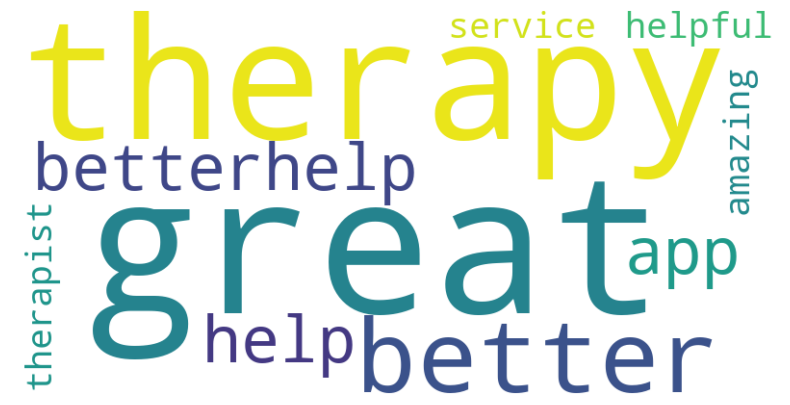

In [46]:
# Combine all words into a single string
all_words = ' '.join(df['Word'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_words)



# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

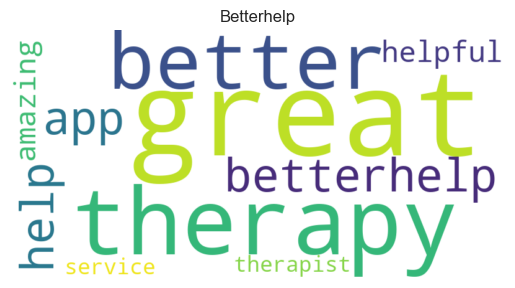

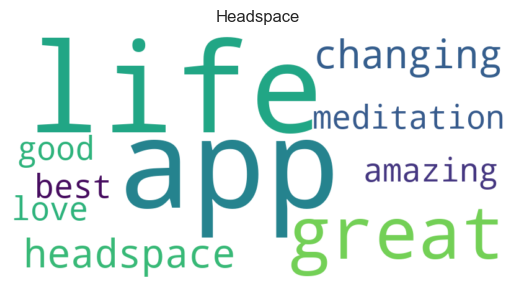

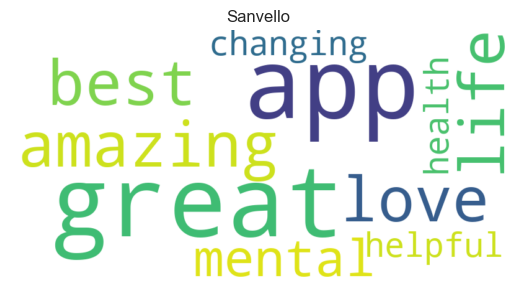

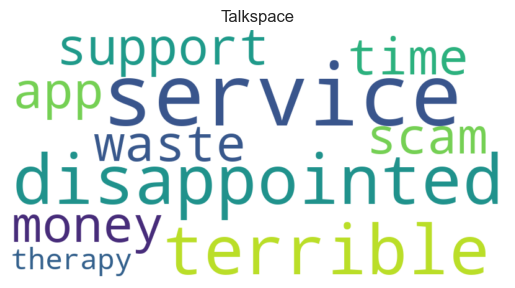

In [47]:
# Create a DataFrame
df = pd.DataFrame(data)

# Get unique apps
apps = df['App'].unique()

# Generate and save word clouds for each app
for app in apps:
    # Filter data for the specific app
    app_data = df[df['App'] == app]
    
    # Generate the word cloud
    text = ' '.join(app_data['Word'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Save the word cloud as JPEG
    file_path = f'{app}_wordcloud.jpg'
    wordcloud.to_file(file_path)
    
    # Optionally, display the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{app}')
    plt.axis('off')
    plt.show()

### iv. Emotional Analysis 

In [48]:
# Define the file path
file_path = '/Users/wenboyang/Desktop/Data Analytics/Mental Health Apps Analysis /NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

# Load the NRC Emotion Lexicon
with open(file_path, 'r') as file:
    lines = file.readlines()

# Create a dictionary mapping words to their associated emotions
word_emotion_dict = {}
for line in lines:
    word, emotion, value = line.strip().split('\t')
    if int(value) == 1:
        if word not in word_emotion_dict:
            word_emotion_dict[word] = []
        word_emotion_dict[word].append(emotion)

In [49]:
# Define a function to perform emotional analysis
def analyze_emotion(text):
    emotions = []
    for word in text.split():
        if word in word_emotion_dict:
            emotions.extend(word_emotion_dict[word])
    return emotions

# Apply the emotional analysis to the 'lemmatized_text' column
combined_df['emotions'] = combined_df['lemmatized_text'].apply(analyze_emotion)

# Group the results by 'App'
app_emotions = combined_df.groupby('app')['emotions'].sum().reset_index()

In [50]:
app_emotions

,app,emotions
0,Betterhelp,"[anticipation, joy, positive, trust, positive,..."
1,Headspace,"[positive, trust, negative, positive, positive..."
2,Sanvello,"[positive, anticipation, positive, anticipatio..."
3,Talkspace,"[anticipation, anticipation, anticipation, neg..."


In [51]:
# Count the occurrences of each emotion for each app
app_emotion_counts = app_emotions['emotions'].apply(lambda x: pd.Series(x)).stack().value_counts().reset_index()
app_emotion_counts.columns = ['Emotion', 'Count']

In [52]:
# Assuming 'app_emotions' DataFrame has an 'App' column and 'emotions' column
app_emotion_counts = app_emotions.apply(lambda row: pd.Series(row['emotions']).value_counts(), axis=1).fillna(0)

# Add the 'App' column to the DataFrame
app_emotion_counts['app'] = app_emotions['app']

# Melt the DataFrame to have Emotion, Count, and App as separate columns
app_emotion_counts_melted = app_emotion_counts.melt(id_vars=['app'], var_name='Emotion', value_name='Count')

# Now, 'app_emotion_counts_melted' DataFrame has Emotion, Count, and App columns

In [53]:
app_emotion_counts_melted

,app,Emotion,Count
0,Betterhelp,anger,342
1,Headspace,anger,422
2,Sanvello,anger,221
3,Talkspace,anger,207
4,Betterhelp,anticipation,1097
5,Headspace,anticipation,1171
6,Sanvello,anticipation,555
7,Talkspace,anticipation,394
8,Betterhelp,disgust,203
9,Headspace,disgust,222


In [54]:
app_emotion_counts

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,app
0,342,1097,203,468,866,804,2240,472,349,1366,Betterhelp
1,422,1171,222,555,906,963,2207,616,326,1174,Headspace
2,221,555,102,311,366,457,840,287,167,473,Sanvello
3,207,394,134,176,222,427,703,226,140,445,Talkspace


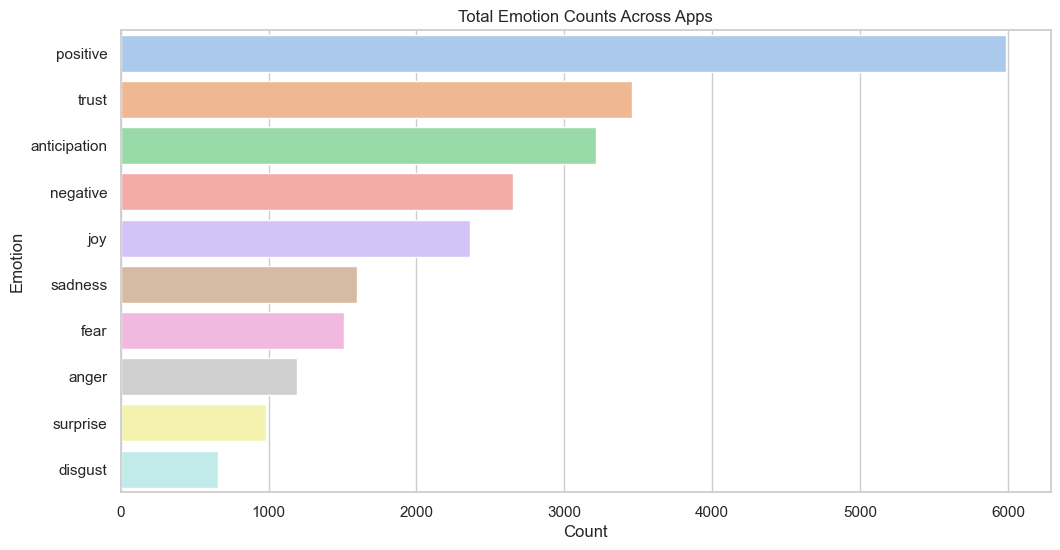

In [55]:
# Calculate total emotion counts across all apps
total_emotion_counts = app_emotion_counts_melted.groupby('Emotion')['Count'].sum().reset_index()

# Sort the DataFrame by counts in descending order
total_emotion_counts = total_emotion_counts.sort_values(by='Count', ascending=False)

# Set the style of the plot
sns.set(style="whitegrid")

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(y='Emotion', x='Count', data=total_emotion_counts, palette='pastel')
plt.title('Total Emotion Counts Across Apps')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()

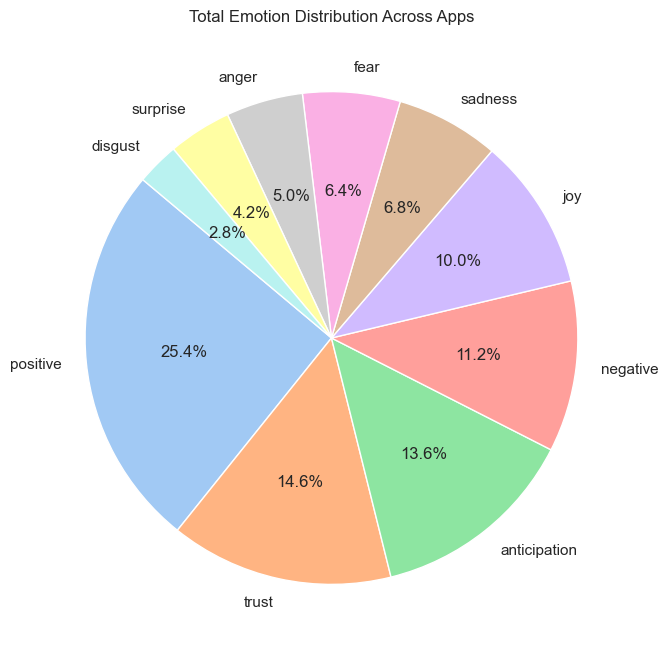

In [56]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_emotion_counts['Count'], labels=total_emotion_counts['Emotion'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Total Emotion Distribution Across Apps')
plt.show()

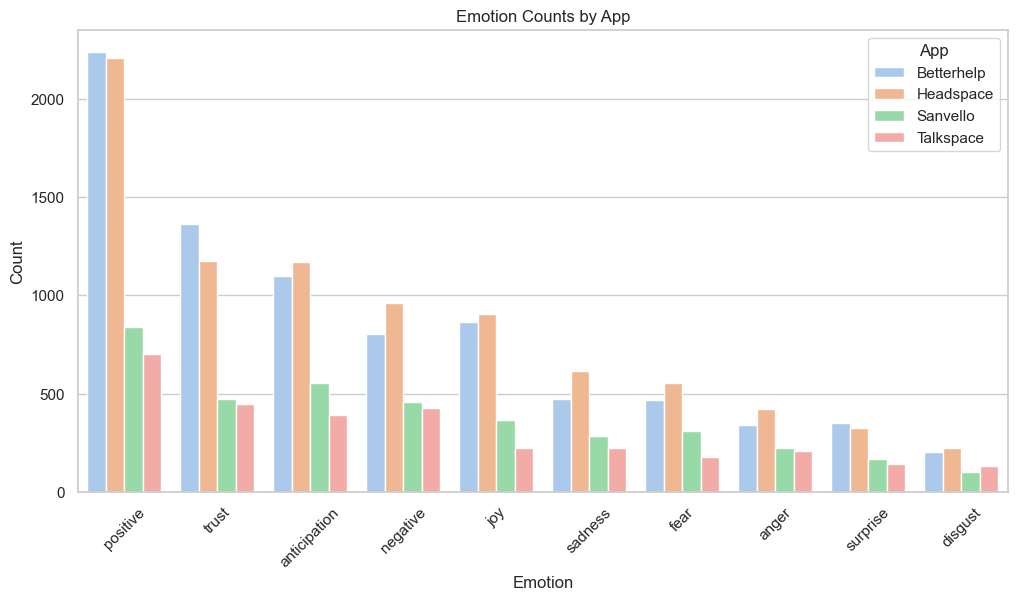

In [61]:
# Set the style of the plot
sns.set(style="whitegrid")

# Define the order of emotions (ranked from most to least)
emotion_order = ['positive', 'trust', 'anticipation', 'negative', 'joy', 'sadness', 'fear', 'anger', 'surprise', 'disgust']

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Emotion', y='Count', hue='app', data=app_emotion_counts_melted, palette='pastel', order=emotion_order)
plt.title('Emotion Counts by App')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='App', loc='upper right')
plt.show()

In [58]:
combined_df

,app,date,review,rating,isEdited,userName,title,developerResponse,cleaned_text,tokenized_text,filtered_text,lemmatized_text,sentiment_scores,sentiment_polarity,emotions
0,Betterhelp,2022-07-07 02:07:58,This is the perfect therapy for me. I am a bus...,5,False,baileysmith7,love,NaN,this is the perfect therapy for me i am a busy...,"[this, is, the, perfect, therapy, for, me, i, ...","[perfect, therapy, busy, person, balance, work...",perfect therapy busy person balance work full ...,"{'neg': 0.058, 'neu': 0.621, 'pos': 0.321, 'co...",0.9912,"[anticipation, joy, positive, trust, positive,..."
1,Betterhelp,2023-09-14 22:16:29,This has been a huge help with not only connec...,5,False,CNGJCG,great option for someone with a busy work sche...,NaN,this has been a huge help with not only connec...,"[this, has, been, a, huge, help, with, not, on...","[huge, help, connecting, high, trained, therap...",huge help connecting high trained therapist pe...,"{'neg': 0.031, 'neu': 0.738, 'pos': 0.231, 'co...",0.9799,"[anticipation, joy, positive, trust, anticipat..."
2,Betterhelp,2021-05-12 23:57:19,I’d been putting off finding a therapist becau...,5,False,essdogg,only wish i’d joined sooner,"{'id': 35897874, 'body': 'Hey essdogg, My name...",id been putting off finding a therapist becaus...,"[id, been, putting, off, finding, a, therapist...","[id, putting, finding, therapist, sifting, loc...",id putting finding therapist sifting local rec...,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",0.9895,"[anticipation, joy, positive, surprise, trust,..."
3,Betterhelp,2021-11-09 15:52:39,I appreciate this company and their support ha...,5,False,Tiffany J. Kim,you need to keep searching to find your clinician,NaN,i appreciate this company and their support ha...,"[i, appreciate, this, company, and, their, sup...","[appreciate, company, support, great, trying, ...",appreciate company support great trying talksp...,"{'neg': 0.014, 'neu': 0.695, 'pos': 0.291, 'co...",0.9901,"[positive, positive, fear, negative, sadness, ..."
4,Betterhelp,2023-05-22 14:44:35,I have been using better help for over a year ...,5,False,Melanie 👑,simply amazing,NaN,i have been using better help for over a year ...,"[i, have, been, using, better, help, for, over...","[using, better, help, year, first, let, say, t...",using better help year first let say therapist...,"{'neg': 0.12, 'neu': 0.598, 'pos': 0.282, 'com...",0.9826,"[fear, negative, anger, fear, negative, sadnes..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Sanvello,2022-05-28 20:46:29,"Confusing and hard to navigate, the first scre...",3,False,Fjitfcnlgddjm,too many features?,"{'id': 30078378, 'body': 'Thanks for your revi...",confusing and hard to navigate the first scree...,"[confusing, and, hard, to, navigate, the, firs...","[confusing, hard, navigate, first, screen, lik...",confusing hard navigate first screen like kitc...,"{'neg': 0.292, 'neu': 0.593, 'pos': 0.115, 'co...",-0.9182,"[anger, anticipation, fear, negative, sadness,..."
596,Sanvello,2018-03-28 17:09:26,It’s great! I can see my mood as a line graph....,5,False,G is for greaaaat yay,my university i introduced me to this app!,"{'id': 2972484, 'body': 'Thanks for the feedba...",its great i can see my mood as a line graph da...,"[its, great, i, can, see, my, mood, as, a, lin...","[great, see, mood, line, graph, day, using, ap...",great see mood line graph day using app realiz...,"{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp...",0.9860,"[anticipation, anticipation, joy, positive, su..."
597,Sanvello,2020-11-02 18:36:07,Sanvello is awesome for people who need help w...,5,False,GirlyCatGamer1323,this is the best thing ever!!!!!!,NaN,sanvello is awesome for people who need help w...,"[sanvello, is, awesome, for, people, who, need...","[sanvello, awesome, people, need, help, emotio...",sanvello awesome people need help emotion medi...,"{'neg': 0.088, 'neu': 0.493, 'pos': 0.419, 'co...",0.9846,"[anticipation, positive, anticipation, j

In [59]:
# Set max column width to display full text
pd.set_option('display.max_colwidth', None)

In [60]:
# Save the DataFrame as a CSV file
combined_df.to_excel('mentalhealthappsdata.xlsx', index=False)